<a href="https://colab.research.google.com/github/adhi-svg/code-project/blob/main/Cracking_The_Market_Code_With_AI_Driven_Stock_Price_Prediction_Using_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (only run once)
!pip install yfinance
!pip install tensorflow
!pip install mplfinance
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input

In [ ]:
# Step 2: Upload the Dataset
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

Saving GOOGL (1).csv to GOOGL (1).csv


In [ ]:
# Step 3: Clean the Dataset
print("Initial Missing Values:\n", data.isnull().sum())
data = data[['Date', 'Close']].dropna()  # Ensure only necessary columns and no NaNs
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

Initial Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Step 4: Check again
print("After Cleanup:\n", data.isnull().sum())

After Cleanup:
 Close    0
dtype: int64


In [ ]:
# Step 5: Normalize the Close Price
close_data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

In [ ]:
# Step 6: Split data into Train and Test
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Step 7: Prepare Training Sequences
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Step 8: Build LSTM Model
model = Sequential()
model.add(Input(shape=(60, 1)))  # Define input shape explicitly
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Step 9: Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0021 - val_loss: 1.1963e-04
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.0754e-05 - val_loss: 2.2089e-04
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.6691e-05 - val_loss: 1.0028e-04
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.9971e-05 - val_loss: 1.0111e-04
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.2671e-05 - val_loss: 1.0670e-04


In [ ]:
# Step 10: Prepare Test Sequences
X_test, y_test = [], []
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Step 11: Predict and Inverse Scale
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Step 12: MSE Evaluation
mse = mean_squared_error(real_stock_price, predictions)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 3951.7848


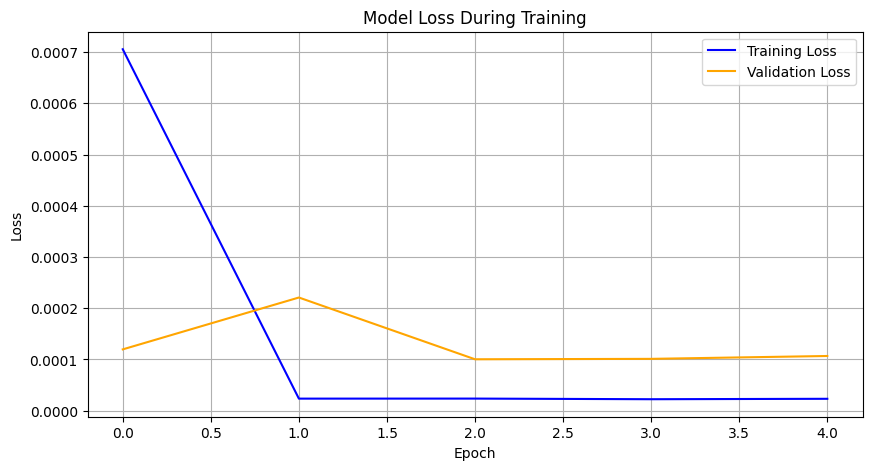

In [ ]:
# Step 13: Plot Loss History
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

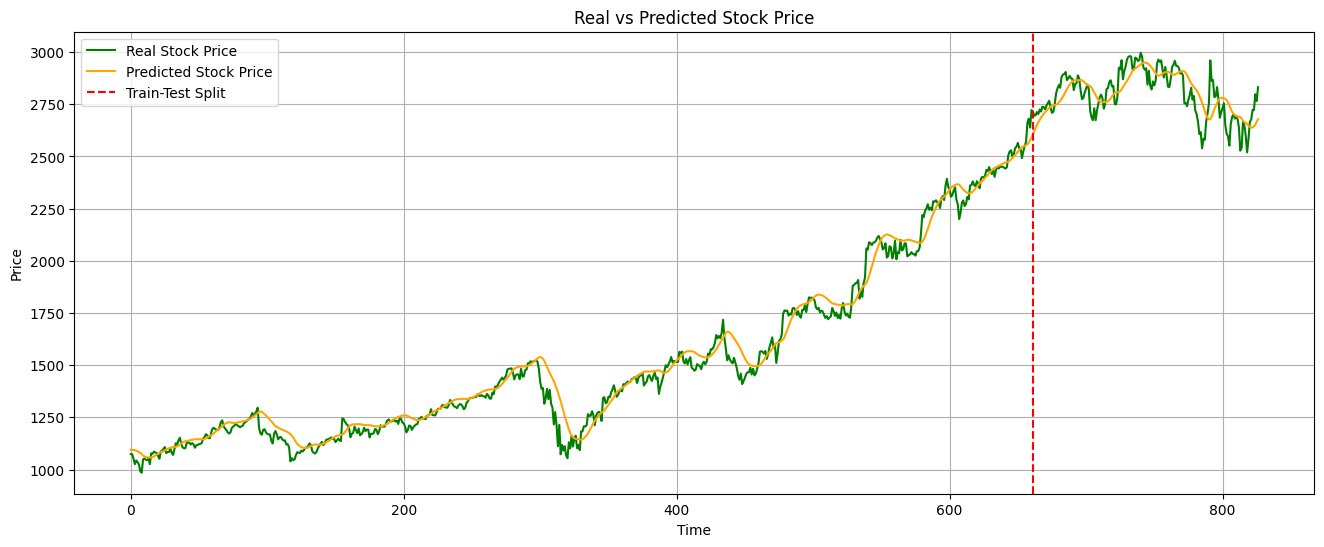

In [ ]:

# Step 14: Plot Real vs Predicted
plt.figure(figsize=(16,6))
plt.plot(real_stock_price, label='Real Stock Price', color='green')
plt.plot(predictions, label='Predicted Stock Price', color='orange')
plt.axvline(x=int(len(real_stock_price)*0.8), color='red', linestyle='--', label='Train-Test Split')
plt.title('Real vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

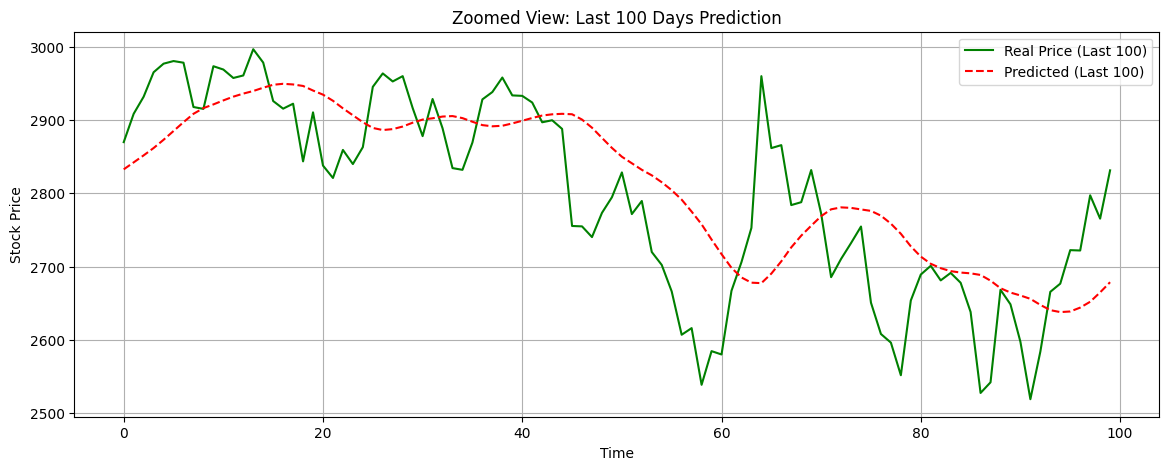

In [ ]:
# Step 15: Zoomed Last 100 Predictions
plt.figure(figsize=(14,5))
plt.plot(real_stock_price[-100:], color='green', label='Real Price (Last 100)')
plt.plot(predictions[-100:], color='red', linestyle='--', label='Predicted (Last 100)')
plt.title('Zoomed View: Last 100 Days Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()